# Migration policy in Switzerland
Migration policy in Switzerland
DPS is an institute of the International Migration Institute (IMI) at the University of Oxford, focusing on research on international migration and its impact on societies, economies, and politics. In this exercise, a graph is created and analyzed using data from DPS. Specifically, political initiatives in Switzerland since 2000 are examined in relation to the affected migration groups. After the initial reading of the classified text passages, the coding for "Affected Migration Groups" was initially divided into binary (0 = Workers and 1 = Asylum Seekers/Refugees). As the coding progressed, it became clear that there were many instances in the dataset that either affected all migrants or could not be assigned. Subsequently, the coding was specified as follows: 0 = No information, 1 = Workers, 2 = Asylum Seekers/Refugees, 3 = All Migrants. The last category includes measures that affect both workers and asylum seekers/refugees. Many aspects targeting irregular migration are present in the text passages. Since it was not explicitly clear which migration groups were affected, they were assigned to the category "0 = No information," which may introduce a bias in this study. Another bias is that the developments in the dataset only go up to 2013. Since then, not only globally but also in Swiss migration policy, much has changed. The aim of this exercise is to illustrate and examine the impacts of this policy-making and development in Switzerland on specific migration groups. The results will be presented graphically and further analyzed.

In [15]:
#setwd('policy_analysis')

In [14]:
file_path = 'data/policy_database_switzerland.csv'
ds<-read.csv(file_path, header = TRUE)
num_rows<-nrow(ds)
years<-unique(ds['Year'])

In [ ]:
num_years<-nrow(years)

# Group array initialization 
g0<-matrix(c(years[1:num_years,1], integer(num_years)), nrow = num_years, ncol = 2)
g1<-matrix(c(years[1:num_years,1], integer(num_years)), nrow = num_years, ncol = 2)
g2<-matrix(c(years[1:num_years,1], integer(num_years)), nrow = num_years, ncol = 2)
g3<-matrix(c(years[1:num_years,1], integer(num_years)), nrow = num_years, ncol = 2)

# Counting the number of group appearance for each year
for (i in 1:num_years) {
  year <- years[i, 1]

  for (j in 1:num_rows) {
    if (ds[j, 1] == year) {
      group <- ds[j, 2]
      if (group == 0) {
        index <- which(g0 == year)
        g0[i,2] <- g0[i,2] + 1 
      } 
      if (group == 1) {
        index <- which(g1 == year)
        g1[i,2] <- g1[i,2] + 1 
      } 
      if (group == 2) {
        index <- which(g2 == year)
        g2[i,2] <- g2[i,2] + 1 
      } 
      if (group == 3) {
        index <- which(g3 == year)
        g3[i,2] <- g3[i,2] + 1 
      } 
    }
  }
}

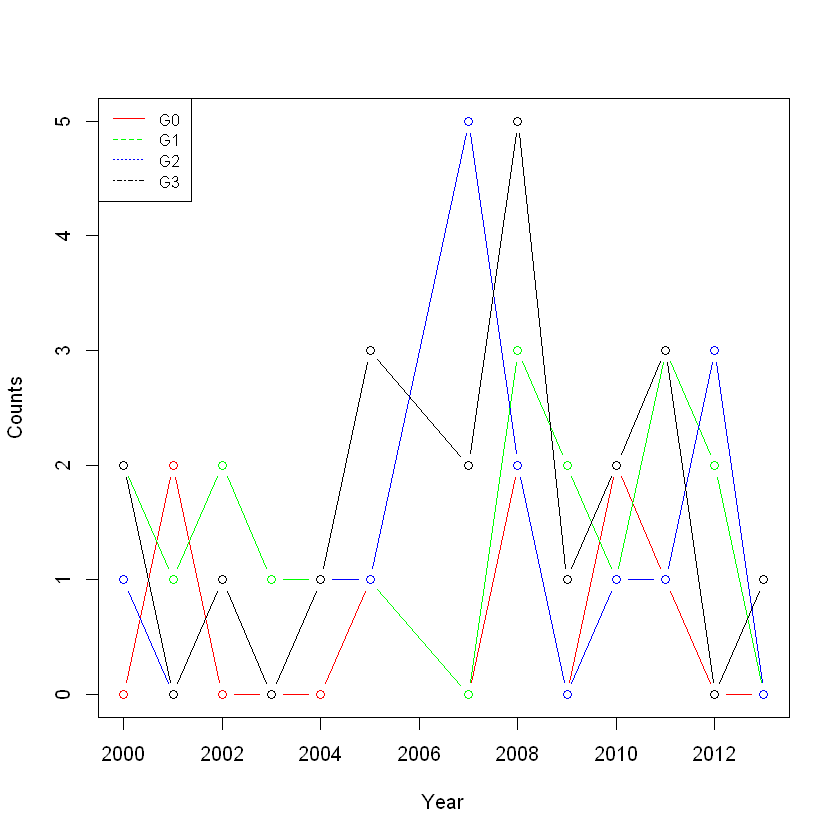

In [17]:
x<-g0[,1]
plot(x, g0[,2], type = 'b', col = 'red', ylim = c(0, 5), ylab='Counts', xlab = 'Year')
lines(x, g1[,2], type = 'b', col = 'green')
lines(x, g2[,2], type = 'b', col = 'blue')
lines(x, g3[,2], type = 'b', col = 'black')
legend("topleft", legend=c('G0', 'G1', 'G2', 'G3'), col=c('red', 'green', 'blue', 'black'), lty = 1:4, cex=0.8)  